In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from source.tserie import TSerie
# from source.keras_utils import getPeaxFeatures
from source.torch_utils import getContrastiveFeatures
# import os
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

/home/texs/anaconda3/envs/contrastive/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from source.datasets import loadFuncionalModel, loadNatops, loadWafer, loadSelfRegulationSCP2, loadBasicMotions, loadEarthquakes, loadItalyPowerDemand, loadEigenWorms

dataset = 'italy' # natops | wafer | selfreg | basicmotions | earthquakes | italy | eigenworms

if dataset == 'natops':
    X_train, y_train, X_test, y_test, classLabels = loadNatops()
elif dataset == 'wafer':
    X_train, y_train, X_test, y_test = loadWafer()
    classLabels = {}
elif dataset == 'basicmotions':
    X_train, y_train, X_test, y_test, classLabels= loadBasicMotions()
elif dataset == 'italy':
    X_train, y_train, X_test, y_test, classLabels= loadItalyPowerDemand()

X = np.concatenate([X_train, X_test], axis=0).transpose([0, 2, 1])
y = np.concatenate([y_train, y_test], axis=0)
# y = np.array([float(v) for v in y]).astype(int).tolist()

In [3]:
mts = TSerie(X=X)

Loaded mts - N: 1096, T: 24, D: 1 


In [4]:
# mts.smooth(window_size=40)
mts.shapeNormalizization()
mts.minMaxNormalizization()

(1096, 1, 24)


In [5]:
mts.folding_features_v2()

Features shape: (1096, 24)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


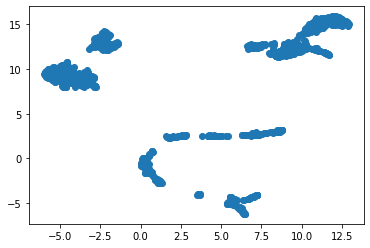

In [6]:
import umap

# reducer = umap.UMAP(n_components=2, metric='cosine')
reducer = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=12)
coords = reducer.fit_transform(mts.features)
import matplotlib.pyplot as plt
plt.scatter(coords[:, 0], coords[:, 1])

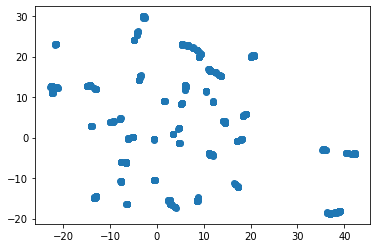

In [7]:
reducer = umap.UMAP(n_components=2, metric='braycurtis', n_neighbors=12)
coords_mean = reducer.fit_transform(mts.magnitudes)

plt.scatter(coords_mean[:, 0], coords_mean[:, 1])

Features shape: (1096, 24)


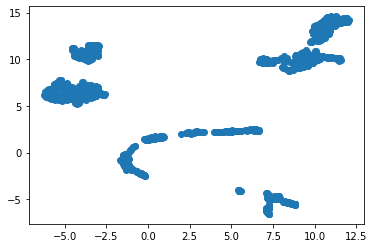

In [8]:
mts.folding_features_v2(isNorm=True)
reducer = umap.UMAP(n_components=2, metric='euclidean', n_neighbors=12)
coords_orig = reducer.fit_transform(mts.features)
plt.scatter(coords_orig[:, 0], coords_orig[:, 1])

In [9]:
import sys
sys.path.append('/home/texs/Documentos/Repositories/mts_viz')
from server.source.storage import MTSStorage

In [10]:
storage = MTSStorage('mts')    
# storage.delete()
storage.load()

# classLabels = {int(v): str(v) for v in np.unique(y)}
dimensions = [str(dim) for dim in range(mts.D)]
# dimensions = [sPoll, sPoll + '_norm']
# dimensions = pollutants + [poll + '_norm' for poll in pollutants]
data = np.concatenate([mts.X_orig, mts.X], axis=2) 
storage.add_mts(
    '{}_umap'.format(dataset),
    data, 
    dimensions = dimensions + [dim+ '_norm' for dim in dimensions], 
    labels = {'class': y},
    labelsNames = {'class': classLabels},
    coords = {
        'shape': coords,
        'magnitude': coords_mean,
        'original': coords_orig,
    },
    sampling=True,
    n_samples= 400
)



storage.save()

mts shape: N: 1096 -  T: 24 - D: 2
